In [ ]:
#| default_exp analytics

In [ ]:
#| export
import numpy as np

In [ ]:
#| hide
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step length distribution generators

In [ ]:
#| export
def pdf_multimode(L_max: int, # Maximum L for which probability is calculated
                     num_modes: int, # Number of modes 
                     lambdas: list, # Scales of each modes
                     probs: list # Probability weight of each mode
                    )-> np.array: # Array with probability of each L
    '''  Computes the discrete PDF of multi-mode exponential of the form
    
    SUM_i[ probs_i (1-Exp(-1/lambda_i)) Exp(-(L-1)/lambda_i) ]
    
    '''
    pdf = [np.sum((probs)*(np.exp(1/lambdas)-1)*np.exp(-L/lambdas)) for L in np.arange(1, L_max)]
    return pdf/np.sum(pdf)

In [ ]:
lambdas, probs

(array([  2, 150]), array([0.98859749, 0.01140251]))

Text(0, 0.5, 'P(L)')

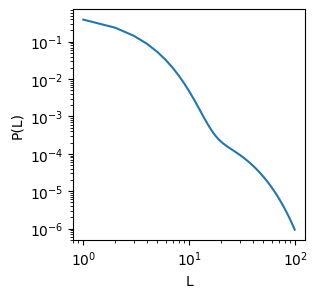

In [ ]:
lambdas = np.array([2,15])
probs = np.array([0.99, 0.01])
L_max = 100
plt.loglog(np.arange(1, L_max),
           pdf_multimode(L_max = L_max, lambdas=lambdas, probs=probs, num_modes = len(probs))
          )
plt.xlabel('L'); plt.ylabel('P(L)')

In [ ]:
#| export
from scipy.special import zeta

def pdf_powerlaw(L_max: int, # Maximum L for which probability is calculated
                 alpha: float = 1, # Exponent of the power law
                )-> np.array : # Array with probability of each L
    ''' Computes the discrete PDF of a powerlaw of the form 
    P(L) = L^(-alpha-1)'''
    return (1/zeta(alpha+1, q = 1))*np.arange(1,L_max).astype(float)**(-1-alpha)

Text(0, 0.5, 'P(L)')

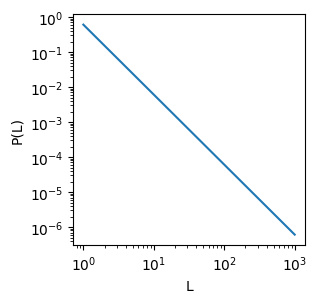

In [ ]:
plt.loglog(np.arange(1, 1000),
           pdf_powerlaw(L_max = 1000, alpha = 1)
          )
plt.xlabel('L'); plt.ylabel('P(L)')

In [ ]:
#| export
def pdf_discrete_sample(pdf_func: object, # Function generating the pdf
                         num_samples: int, # Number of samples to create
                         **args_func # Arguments of the generating funcion
                        )-> np.array: # Samples
    ''' Samples discrete values from a given PDF'''
    P_L = pdf_func(**args_func)
    
    return np.random.choice(np.arange(1, len(P_L)+1), p = P_L, size = num_samples)
    

<matplotlib.legend.Legend>

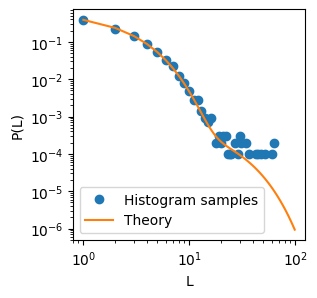

In [ ]:
samples = pdf_discrete_sample(pdf_func = prob_L_composite, 
                              num_samples=10000, 
                              L_max = L_max, lambdas=lambdas, probs=probs, num_modes = 2)

counts = np.bincount(samples)[1:]

plt.loglog(np.arange(1, len(counts)+1),
           counts/counts.sum(), 'o', 
           label = 'Histogram samples')

plt.loglog(np.arange(1, L_max),
           pdf_multimode(L_max = L_max, lambdas=lambdas, probs=probs, num_modes = 2),
           label = 'Theory'
          )
plt.xlabel('L'); plt.ylabel('P(L)'); plt.legend()

# Calculate policy from step length PDF

In [ ]:
ps = np.zeros(L)
ps[0] = ps_0    




for l in range(2, L+1):

    # product
    prod = np.prod(ps[:l-1])
    # P(L-1)
    p_lm1 = (1/zeta(alpha+1, q = 1))*(l-1)**(-alpha-1)
    # all together
    ps[l-1] = 1-p_lm1/prod

In [ ]:
#| export
from scipy.special import zeta

def get_policy(n_max, # Maximum counter n_max for which the policy is calculated
               func, # Function generating the pdf
               ps_0: int = 1, # Value of the policy at L = 0 (should be one)
               **args_func # Arguments of the generating funcion (should have L_max as input parameter)
              )-> np.array : # Policy at each counter value
    ''' Given a PDF of step lengths, calculates the corresponding policy'''
    
    ps = np.zeros(n_max)
    ps[0] = ps_0  
    
    prob_L = func(L_max = n_max+1, **args_func)
    
    for l, p_lm1 in zip(range(2, L+1), prob_L):
        # l starts at 2 but prob_L starts at 1, because we want to divice by P(l-1)
                
        # Product
        prod = np.prod(ps[:l-1])
        # all together
        ps[l-1] = 1-p_lm1/prod
        
    return ps

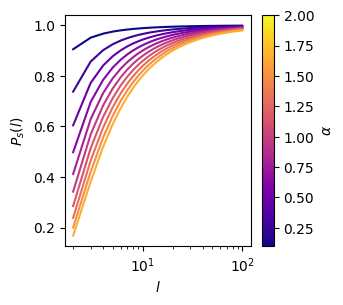

In [ ]:
L = 100
alphas = np.linspace(0.1, 2, 10)
colors = plt.cm.plasma(np.linspace(0,1,len(alphas)+2))

fig, ax = plt.subplots()
for alpha, color in zip(alphas, colors):
    
    policy = get_policy(n_max = L,
                        func = pdf_powerlaw,
                        alpha = alpha)
    ax.plot(np.arange(2, L+1), policy[1:], c = color)


# Plot features    
plt.setp(ax, xlabel =r'$l$', ylabel = r'$P_s(l)$', xscale = 'log')
cbar = fig.colorbar(plt.cm.ScalarMappable(norm= mcolors.Normalize(vmin=alphas.min(), 
                                                                  vmax=alphas.max()),
                                          cmap=plt.cm.plasma),
                    ax = ax)
cbar.set_label(r'$\alpha$')

# nbdev

In [ ]:
from nbdev import nbdev_export ; nbdev_export()